<div align="center"> <h1> <span style="color:blue"> Computations in a given Image Data with </span>  and <span style="color:green">  Maxwell-Boltzmann Statistics
  </span> </h1>
31/July/2019  </br>
Jayakumar.S  </br>
Bangalore 
</div>


In [1]:
!pip install scikit-image
!pip install selenium

In [2]:
import numpy as np
import math as jmath
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread
from numpy import asarray
from PIL import Image
from scipy import ndimage 
import sys
from skimage import measure
from skimage.io import imsave

# from IPython.display import display, HTML, IFrame,YouTubeVideo,Image    
# Issue.....  Image ..from PIL and IPython.display...both are in conflict mode
from IPython.display import display, HTML, IFrame,YouTubeVideo      
import io
import base64
from html import escape
from selenium import webdriver


<span style="font-family:Papyrus; color:green; font-size:2em;">  Read Image and Display </span>

Goal is to read image from gif file

* Input: wint_sky.gif
* Output: image is imported in grey scale, which basically means that each pixel is a shade of grey. 

And each pixel essentially becomes one cell in a matrix. In this case the image is
matrix of 480*581 cells (or image of 480*581 pixels).

In [3]:
image = Image.open('wint_sky.gif')
im1 = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % im1.dtype)
print('Min: %.3f, Max: %.3f' % (im1.min(), im1.max()))
# convert from integers to floats
#pixels = pixels.astype('float32')

Data Type: uint8
Min: 0.000, Max: 255.000


Plot given image 

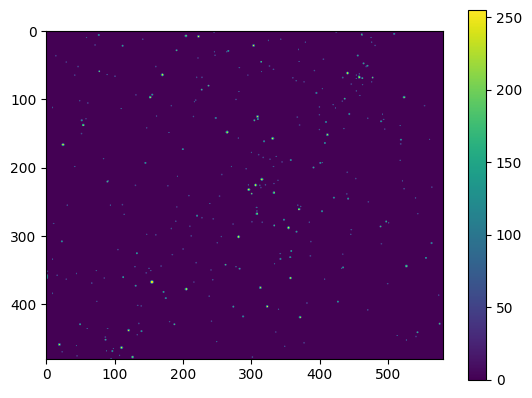

<Figure size 640x480 with 0 Axes>

In [4]:
#plt.imshow(im1, cmap=cm.gray)
plt.imshow(im1)
plt.colorbar()
plt.grid(False)
plt.show()
plt.savefig('f3.jpg', bbox_inches='tight')

In [5]:
display(HTML('<h2> <span style="color:blue">  blog_log  </span> is  <span style="color:green">   Used </h2> </span>'))

Goal is to compute number of stars in a given image 

* Input:  gray image frame with pixel size 480*581
* Output:  number of stars in a given image

Algorithm Used: Blobs_log gives three outputs for each object found. First two are the coordinates 
and the third one is the area of the object. The radius of each blob/object can be estimated 
using this column (area of the object).   

In [6]:
blobs_log = blob_log(im1, max_sigma=30, num_sigma=10, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("Number of stars counted : " ,numrows)

Number of stars counted :  308


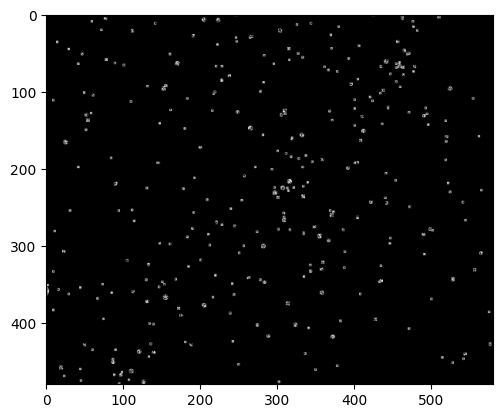

In [7]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
out_l = ndimage.convolve(im1, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
plt.savefig('f4.jpg', bbox_inches='tight')

Laplacian and Gaussian functions to obtain a single Filter in 2D


<span style="font-family:Papyrus; color:blue; font-size:3em;"> 
$ Log(x,y)  = - \frac{1}{2 \pi \sigma^4}  \big[  1 - \frac{x^2 + y^2}{2 \sigma^2} \big]  e^-\frac{x^2 + y^2}{2 \sigma^2} $

</span>


In [8]:
#sigma1 = 1.4
#sigma1 = 5
sigma1 = 2.5
#sigma1 = 0.6
#sigma1 = 1.38
l=9
ax = np.arange(-l // 2 + 1., l // 2 + 1.)
xx, yy = np.meshgrid(ax, ax)
v00 = jmath.pow(sigma1,2)
v01 = jmath.pi
v1 = -1/(v01*v00)
v2 = -0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma1) 
v3 = 1+v2
k2 = np.exp(v2)
k3  = v1*v3*k2
k4 = k3*256
k5 =np.int8(k4)
print(k5)

[[  1   1   1   1   1   1   1   1   1]
 [  1   1   0  -1  -1  -1   0   1   1]
 [  1   0  -2  -5  -6  -5  -2   0   1]
 [  1  -1  -5  -9 -11  -9  -5  -1   1]
 [  1  -1  -6 -11 -13 -11  -6  -1   1]
 [  1  -1  -5  -9 -11  -9  -5  -1   1]
 [  1   0  -2  -5  -6  -5  -2   0   1]
 [  1   1   0  -1  -1  -1   0   1   1]
 [  1   1   1   1   1   1   1   1   1]]


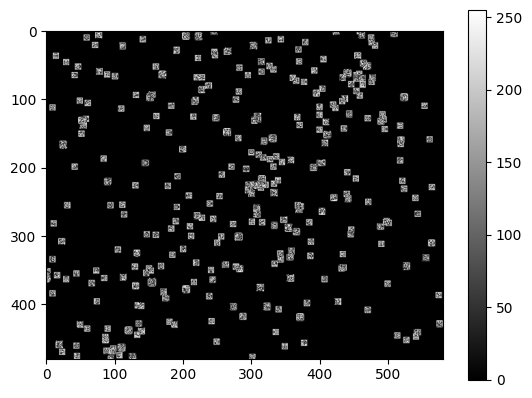

<Figure size 640x480 with 0 Axes>

In [9]:
out2 = ndimage.convolve(im1, k5, mode='reflect')
plt.imshow(out2, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
plt.savefig('f5.jpg', bbox_inches='tight')

Number of stars = 289


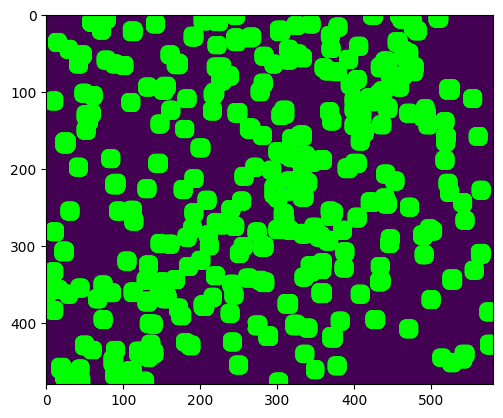

In [10]:
contours = measure.find_contours(out2, 0.8)
len1 = len(contours)
print('Number of stars =',len1)
#print(contours[301])
#x=contours[301]
#len2 = len(x)
#x1= x[3]
#x2= x1[0]
#x3= x1[1]
#print(len(x1))
#print(x3)
fig, ax = plt.subplots(1, 1)
plt.imshow(out2)
for i in range(len(contours)): 
    localStar=contours[i]
    for x4 in localStar:
        yloc, xloc = x4
        c = plt.Circle((xloc, yloc), 5, color='lime', linewidth=2, fill=False)
        ax.add_patch(c)
plt.savefig('f6.jpg', bbox_inches='tight')

# Validate and Display Result

Goal is to validate above computed result
Input
Output
Algorithm: Look at whether above algorithm have spotted all the stars correctly.
For this,  use circling of each estimated star position.
And the look at the image if there is a missing star.

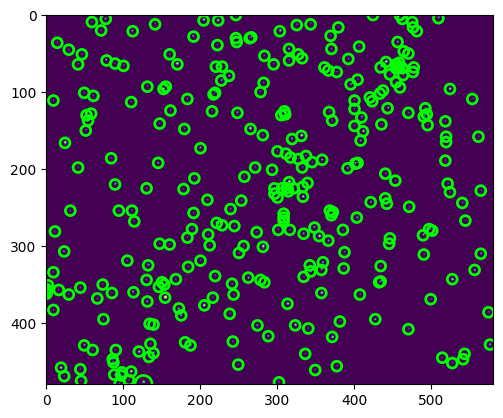

In [11]:
fig, ax = plt.subplots(1, 1)
plt.imshow(im1)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+5, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)
plt.savefig('f7.jpg', bbox_inches='tight')

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}
         @article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}
-->
         

# Reference
*  Ref: https://academic.mu.edu/phys/matthysd/web226/Lab02.htm